In [ ]:
# lets import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

!pip install catboost
!pip install optuna
import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00


In [ ]:
# lets import the data'
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
heart=pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [ ]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# lets choose the numerical and categorical columns
numerical= heart.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = heart.select_dtypes('object').columns

print(f'Numerical Columns:  {heart[numerical].columns}')
print('\n')
print(f'Categorical Columns: {heart[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [ ]:
heart[categorical].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

Target Variable

In [ ]:
y = heart['HeartDisease']

In [ ]:
y.value_counts() # 508 patients had heart disease while 410 patients were healthy

1    508
0    410
Name: HeartDisease, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

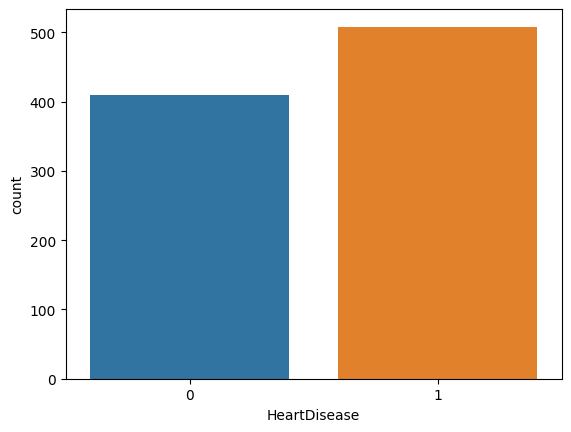

In [ ]:
sns.countplot(heart, x='HeartDisease')

Numerical Features

In [ ]:
heart[numerical].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


<Axes: ylabel='Frequency'>

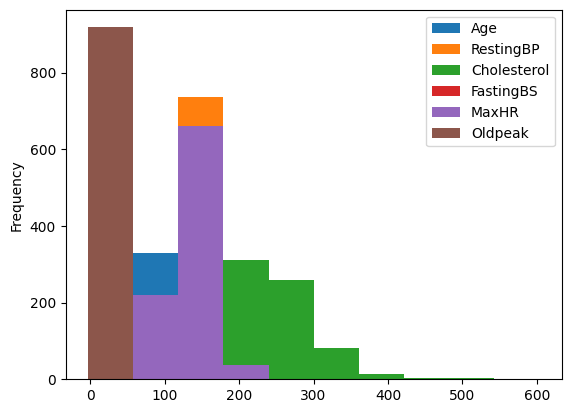

In [ ]:
heart[numerical].plot(kind='hist')

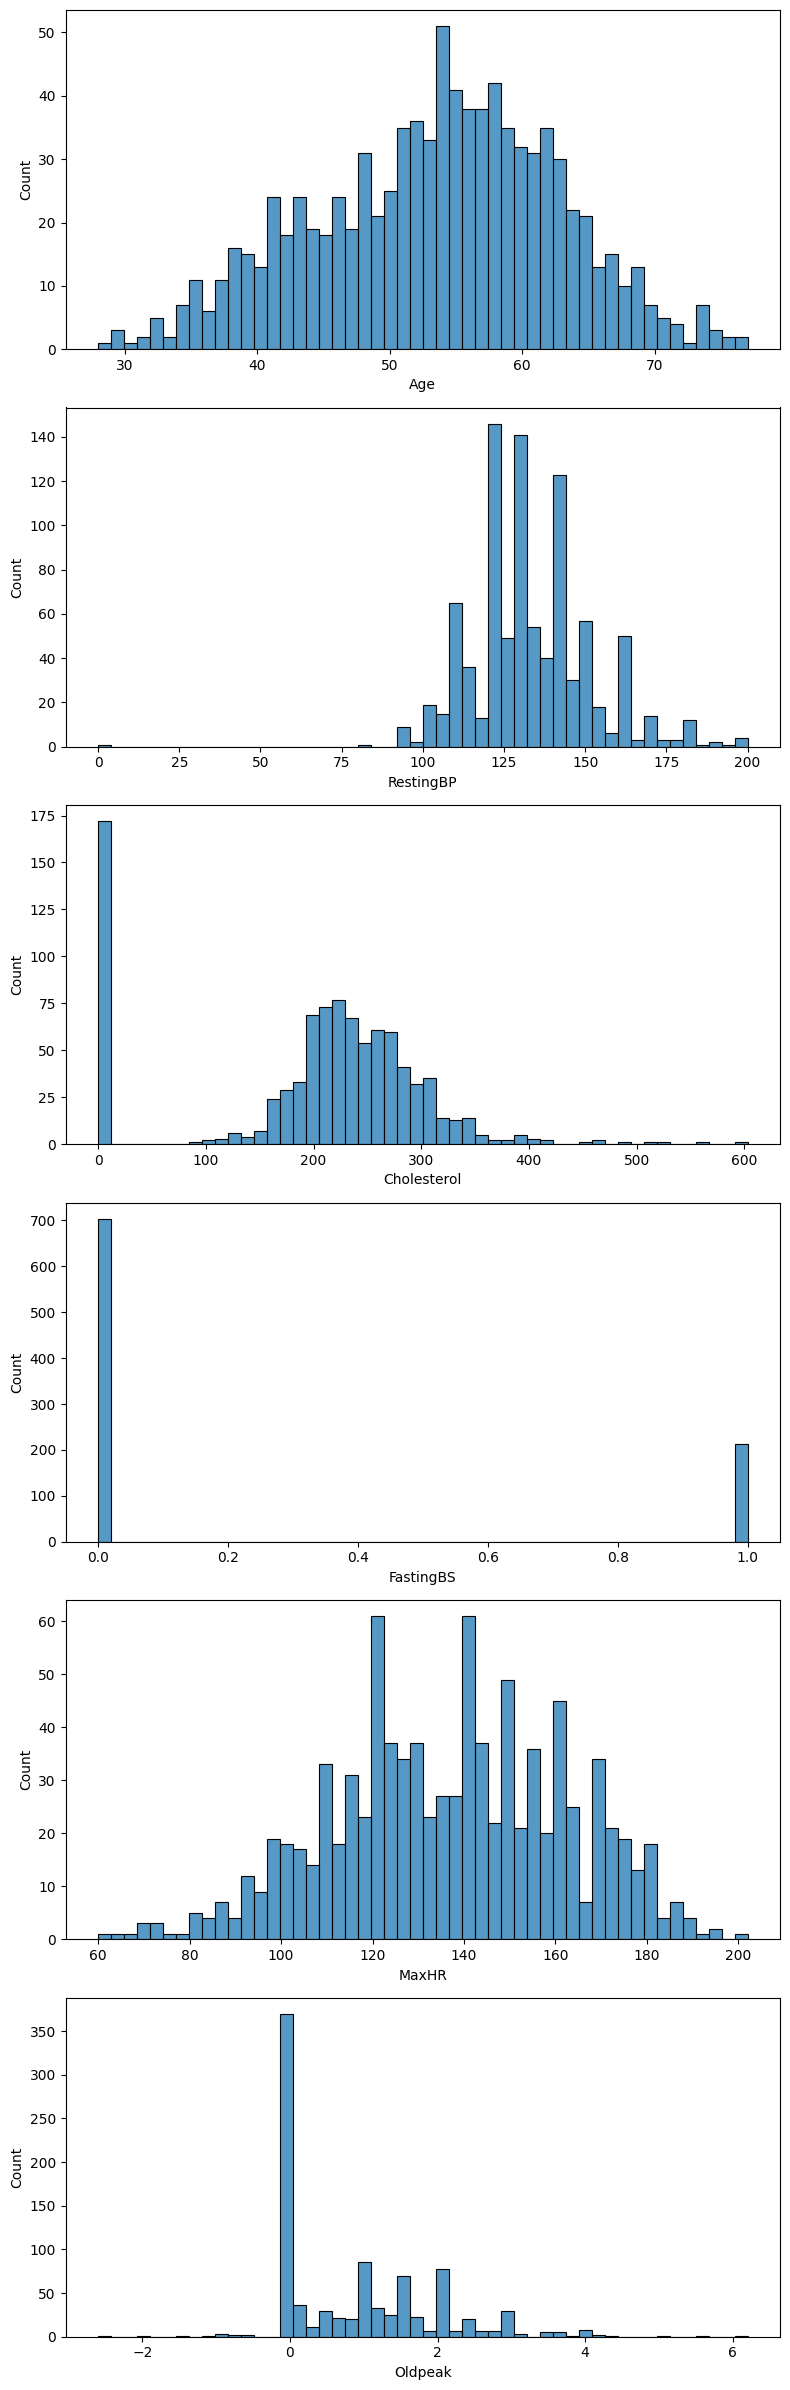

In [ ]:
fig, axes = plt.subplots(len(numerical), 1, figsize=(8, len(numerical)*4))
for i, col in enumerate(numerical):
    # Plot histogram for each numerical column
    sns.histplot(data=heart, x=col, bins=50, ax=axes[i])

# Set spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:



# # Create subplots using Matplotlib
# fig, axes = plt.subplots(len(numerical), 1, figsize=(8, len(numerical)*4))
# for i, col in enumerate(numerical):
#     # Plot histogram for each numerical column
#     axes[i].hist(heart[col], bins=50)

#     # Set plot title and axis labels
#     axes[i].set_title(col)
#     axes[i].set_xlabel('Value')
#     axes[i].set_ylabel('Frequency')

# # Set spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()


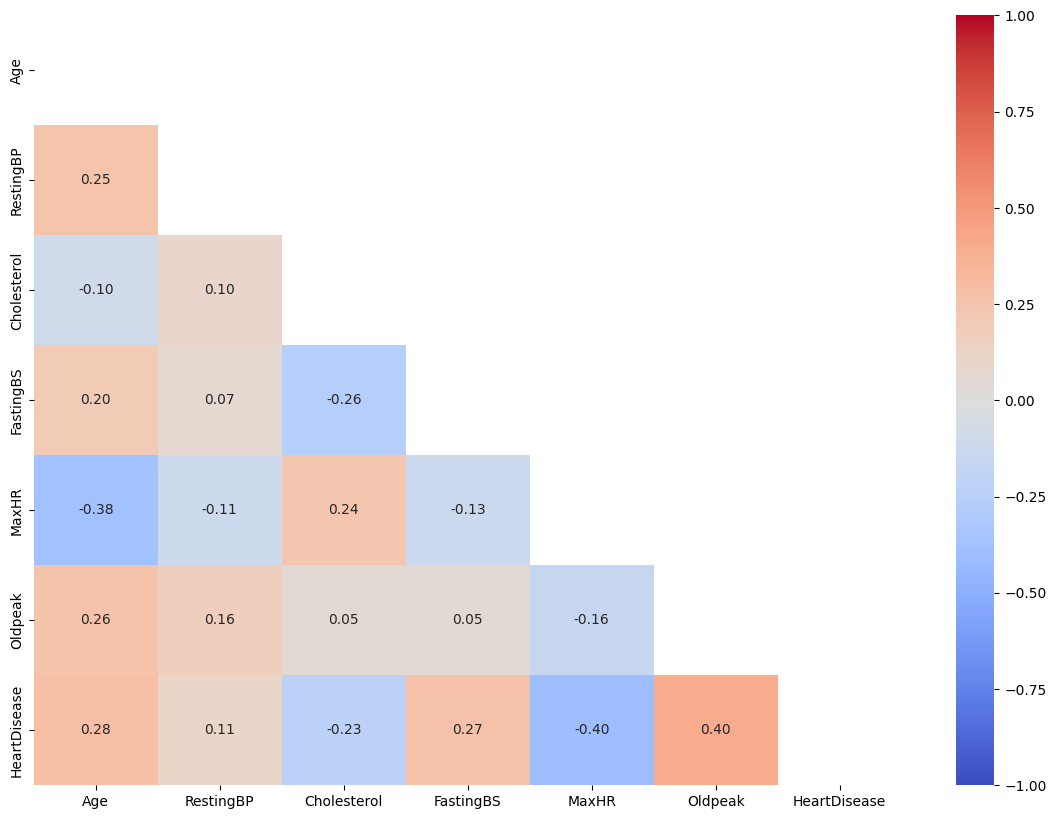

In [ ]:
numerical1= heart.select_dtypes('number').columns


matrix = np.triu(heart[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap (heart[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

Categorical Features

In [ ]:
heart[categorical].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
# relationship btn gender and heart disease
heart.groupby('Sex')['HeartDisease'].mean()

Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64

In [ ]:
heart[heart["Sex"]=="F"]["HeartDisease"].mean()*100 # female

25.906735751295333

In [ ]:
heart[heart["Sex"]=="M"]["HeartDisease"].mean()*100 # male

63.172413793103445

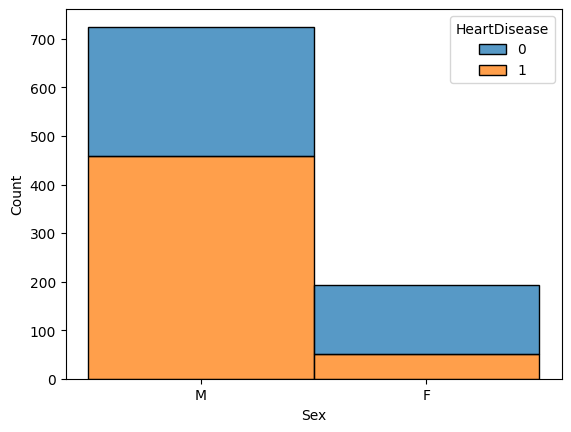

<Figure size 600x600 with 0 Axes>

In [ ]:
# Create a Seaborn histogram using `sns.histplot`
sns.histplot(data=heart, x="Sex", hue="HeartDisease", multiple="stack")

# Set plot size using Matplotlib
plt.figure(figsize=(6, 6))

# Show the plot
plt.show()

In [ ]:
# men are likely to get heart disease compared to women

Chest Pain Type and Heart Disease

In [ ]:
heart.groupby('ChestPainType')['HeartDisease'].mean().sort_values(ascending=False)

ChestPainType
ASY    0.790323
TA     0.434783
NAP    0.354680
ATA    0.138728
Name: HeartDisease, dtype: float64

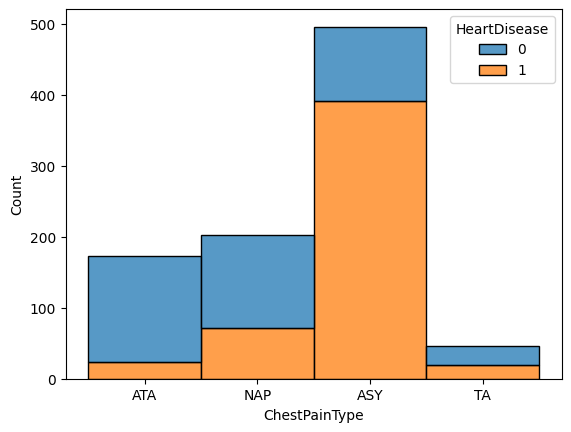

<Figure size 600x600 with 0 Axes>

In [ ]:
 #Create a Seaborn histogram using `sns.histplot`
sns.histplot(data=heart, x="ChestPainType", hue="HeartDisease", multiple="stack")

# Set plot size using Matplotlib
plt.figure(figsize=(6, 6))

# Show the plot
plt.show()

RestingECG and Heart Disease

In [ ]:
heart.groupby('RestingECG')['HeartDisease'].mean().sort_values(ascending=False)

RestingECG
ST        0.657303
LVH       0.563830
Normal    0.516304
Name: HeartDisease, dtype: float64

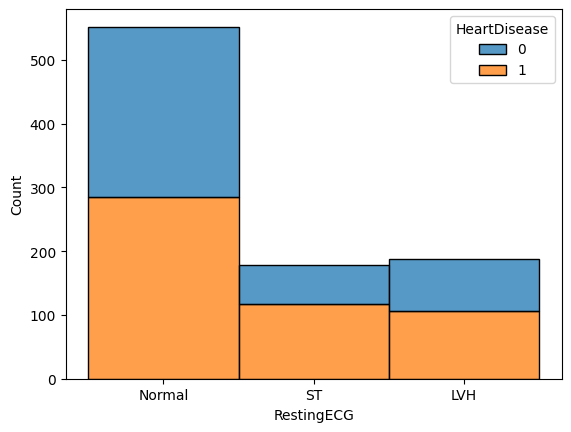

<Figure size 600x600 with 0 Axes>

In [ ]:
 #Create a Seaborn histogram using `sns.histplot`
sns.histplot(data=heart, x="RestingECG", hue="HeartDisease", multiple="stack")

# Set plot size using Matplotlib
plt.figure(figsize=(6, 6))

# Show the plot
plt.show()

ExerciseAngina and Heart Disease

In [ ]:
heart.groupby('ExerciseAngina')['HeartDisease'].mean().sort_values(ascending=False)

ExerciseAngina
Y    0.851752
N    0.351005
Name: HeartDisease, dtype: float64

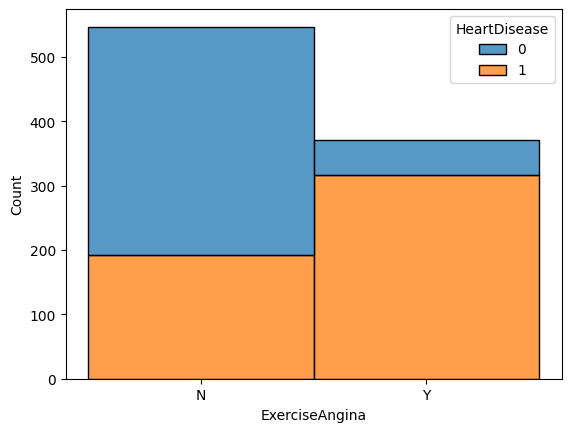

<Figure size 600x600 with 0 Axes>

In [ ]:
 #Create a Seaborn histogram using `sns.histplot`
sns.histplot(data=heart, x="ExerciseAngina", hue="HeartDisease", multiple="stack")

# Set plot size using Matplotlib
plt.figure(figsize=(6, 6))

# Show the plot
plt.show()

ST_Slope and Heart Disease

In [ ]:
heart.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False)

ST_Slope
Flat    0.828261
Down    0.777778
Up      0.197468
Name: HeartDisease, dtype: float64

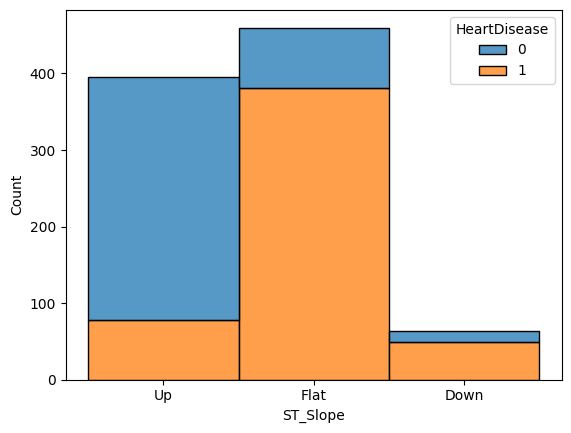

<Figure size 600x600 with 0 Axes>

In [ ]:
 #Create a Seaborn histogram using `sns.histplot`
sns.histplot(data=heart, x="ST_Slope", hue="HeartDisease", multiple="stack")

# Set plot size using Matplotlib
plt.figure(figsize=(6, 6))

# Show the plot
plt.show()

Target variable has close to balanced data.

Numerical features have weak correlation with the target variable.

Oldpeak (depression related number) has a positive correlation with the heart disease.

Maximum heart rate has negative correlation with the heart disease.

Interestingly cholesterol has negative correlation with the heart disease.

Based on the gender; Men are almost 2.44 times more likely have a heart disease than women.

We can observe clear differences among the chest pain type.

Person with ASY: Asymptomatic chest pain has almost 6 times more likely have a heart disease than person with ATA Atypical Angina chest pain.

RestingECG: resting electrocardiogram results don't differ much.

Person with ST: having ST-T wave abnormality is more likely have a heart disease than the others.

ExerciseAngina: exercise-induced angina with 'Yes' almost 2.4 times more likley have a heart disaese than exercise-induced angina with 'No'

ST_Slope: the slope of the peak exercise ST segment has differences.

ST_Slope Up significantly less likely has heart disease than the other two segment.

# Modelling

Baseline Model

dummy classifier

In [ ]:
accuracy =[]
model_names =[]


X= heart.drop('HeartDisease', axis=1)
y= heart['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')


model = DummyClassifier(strategy='constant', constant=1)
pipe = make_pipeline(ct, model)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['DummyClassifier']
dummy_result_df = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
dummy_result_df

model : DummyClassifier(constant=1, strategy='constant') and  accuracy score is : 0.5942


,Accuracy
DummyClassifier,0.5942


Logistic & Linear Discriminant & SVC & KNN

In [ ]:
accuracy =[]
model_names =[]


X= heart.drop('HeartDisease', axis=1)
y= heart['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')


lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]

for model in models:
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Logistic','LinearDiscriminant','SVM','KNeighbors']
result_df1 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df1

model : LogisticRegression(solver='liblinear') and  accuracy score is : 0.8841
model : LinearDiscriminantAnalysis() and  accuracy score is : 0.8696
model : SVC() and  accuracy score is : 0.7246
model : KNeighborsClassifier() and  accuracy score is : 0.7174


,Accuracy
Logistic,0.8841
LinearDiscriminant,0.8696
SVM,0.7246
KNeighbors,0.7174


Logistic & Linear Discriminant & SVC & KNN with Scaler

In [ ]:
accuracy =[]
model_names =[]


X= heart.drop('HeartDisease', axis=1)
y= heart['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
s= StandardScaler()
ct1= make_column_transformer((ohe,categorical),(s,numerical))


lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]

for model in models:
    pipe = make_pipeline(ct1, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Logistic_scl','LinearDiscriminant_scl','SVM_scl','KNeighbors_scl']
result_df2 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df2

model : LogisticRegression(solver='liblinear') and  accuracy score is : 0.8804
model : LinearDiscriminantAnalysis() and  accuracy score is : 0.8696
model : SVC() and  accuracy score is : 0.8841
model : KNeighborsClassifier() and  accuracy score is : 0.8841


,Accuracy
Logistic_scl,0.8804
LinearDiscriminant_scl,0.8696
SVM_scl,0.8841
KNeighbors_scl,0.8841


Ensemble Models (AdaBoost & Gradient Boosting & Random Forest & Extra Trees)

In [ ]:
accuracy =[]
model_names =[]


X= heart.drop('HeartDisease', axis=1)
y= heart['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')

ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)



models = [ada,gb,rf,et]

for model in models:
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Ada','Gradient','Random','ExtraTree']
result_df3 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df3

model : AdaBoostClassifier(random_state=0) and  accuracy score is : 0.8659
model : GradientBoostingClassifier(random_state=0) and  accuracy score is : 0.8768
model : RandomForestClassifier(random_state=0) and  accuracy score is : 0.8877
model : ExtraTreesClassifier(random_state=0) and  accuracy score is : 0.8804


,Accuracy
Ada,0.8659
Gradient,0.8768
Random,0.8877
ExtraTree,0.8804


XGBoost & LightGBM & Catboost

In [ ]:
accuracy =[]
model_names =[]


X= heart.drop('HeartDisease', axis=1)
y= heart['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')

xgbc = XGBClassifier(random_state=0)
lgbmc=LGBMClassifier(random_state=0)


models = [xgbc,lgbmc]

for model in models:
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))

model_names = ['XGBoost','LightGBM']
result_df4 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df4

,Accuracy
XGBoost,0.8297
LightGBM,0.8732


In [ ]:
accuracy =[]
model_names =[]


X= heart.drop('HeartDisease', axis=1)
y= heart['HeartDisease']
categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=False,random_state=0)

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))

model_names = ['Catboost_default']
result_df5 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df5

,Accuracy
Catboost_default,0.8804


Catboost HyperParameter Tuning with Optuna

In [ ]:
def objective(trial):
    X= heart.drop('HeartDisease', axis=1)
    y= heart['HeartDisease']
    categorical_features_indices = np.where(X.dtypes != np.float)[0]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cat_cls = CatBoostClassifier(**param)

    cat_cls.fit(X_train, y_train, eval_set=[(X_test, y_test)], cat_features=categorical_features_indices,verbose=0, early_stopping_rounds=100)

    preds = cat_cls.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-07-07 12:57:39,293] A new study created in memory with name: no-name-fb6b5390-6815-45bd-a2ec-2051c97aa737
[I 2023-07-07 12:57:46,310] Trial 0 finished with value: 0.8913043478260869 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.04538620349028199, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.8913043478260869.
[I 2023-07-07 12:57:48,004] Trial 1 finished with value: 0.894927536231884 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06451722208699391, 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.7450233829695192}. Best is trial 1 with value: 0.894927536231884.
[I 2023-07-07 12:57:50,794] Trial 2 finished with value: 0.8804347826086957 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09272792506043287, 'depth': 6, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.7219785952612983}. Best is trial 1 with value: 0.

Number of finished trials: 50
Best trial:
  Value: 0.9057971014492754
  Params: 
    objective: Logloss
    colsample_bylevel: 0.06682347870879238
    depth: 10
    boosting_type: Plain
    bootstrap_type: MVS


In [ ]:
accuracy =[]
model_names =[]


X= heart.drop('HeartDisease', axis=1)
y= heart['HeartDisease']
categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=False,random_state=0,
                          objective= 'CrossEntropy',
    colsample_bylevel= 0.04292240490294766,
    depth= 10,
    boosting_type= 'Plain',
    bootstrap_type= 'MVS')

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print(classification_report(y_test, y_pred))

model_names = ['Catboost_tuned']
result_df6 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df6

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       112
           1       0.93      0.91      0.92       164

    accuracy                           0.91       276
   macro avg       0.90      0.91      0.91       276
weighted avg       0.91      0.91      0.91       276



,Accuracy
Catboost_tuned,0.9094


Feature Importance

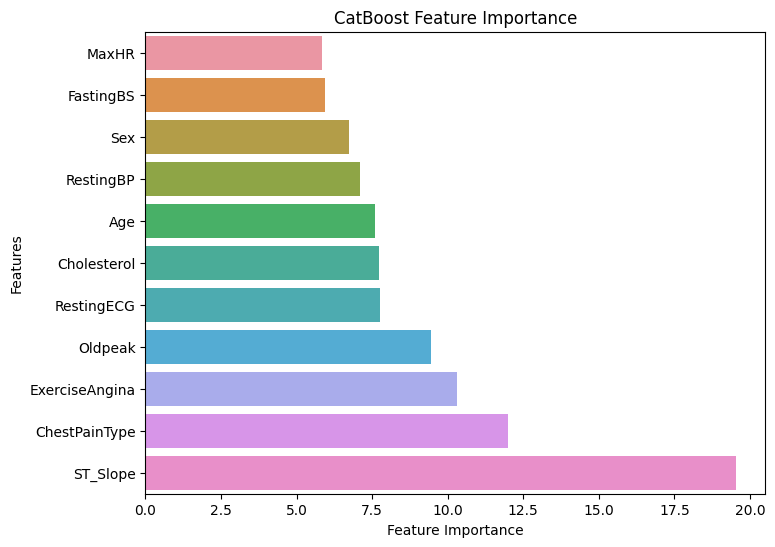

In [ ]:

feature_importance = model.get_feature_importance()
features = np.array(X_train.columns)

fi = {'features': features, 'feature_importance': feature_importance}
df_fi = pd.DataFrame(fi)
df_fi.sort_values(by='feature_importance', ascending=True, inplace=True)

# Plotting the feature importances using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=df_fi, x='feature_importance', y='features')
plt.title("CatBoost Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()









Model Comparison

In [ ]:
result_final = pd.concat([dummy_result_df,result_df1,result_df2,result_df3,result_df4,result_df5,result_df6],axis=0)

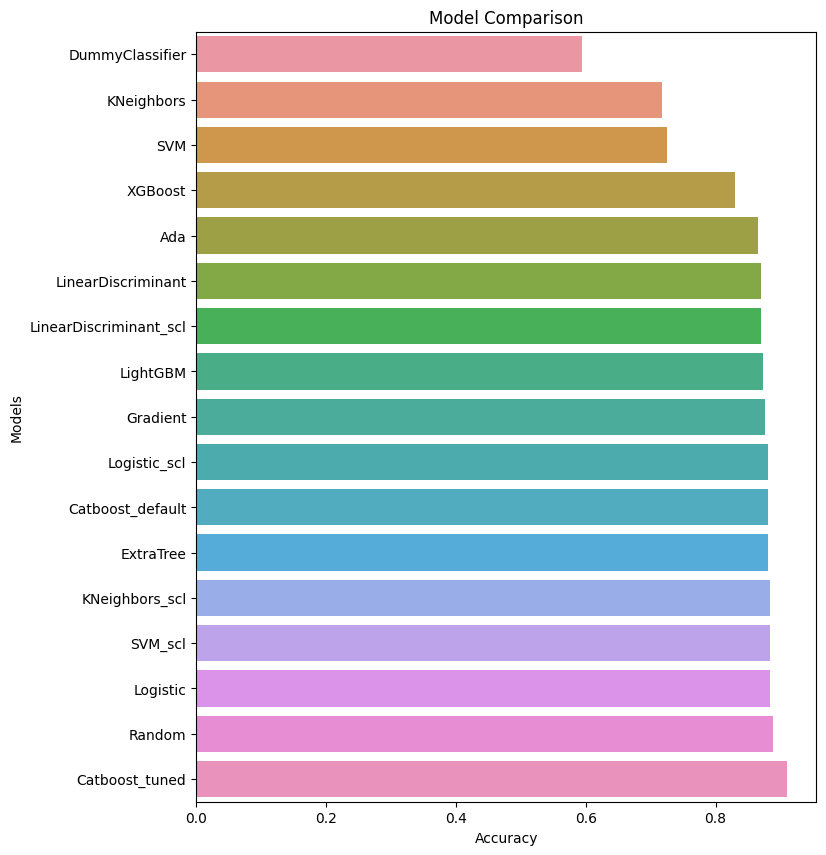

In [ ]:
result_final.sort_values(by='Accuracy', ascending=True, inplace=True)

# Plotting the model comparison using Seaborn
plt.figure(figsize=(8, 10))
sns.barplot(data=result_final, x='Accuracy', y=result_final.index)
plt.title("Model Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.show()